In [50]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
dir_string = 'C:/Users/rannu/OneDrive - NTNU/Desktop/VsPython/'+\
                'Spain/NMfDS/Assignments/'
sys.path.append(dir_string + 'Ass4')
sys.path.append(dir_string + 'Ass6')
sys.path.append(dir_string + 'Ass7')
sys.path.append(dir_string + 'Ass8')
sys.path.append(dir_string + 'Ass9')
from RTBP_definitions import r1, r2, OMEGA, ODE_R3BP, Jacobi_first_integral
from Lagrange_computations import compute_Lagrange_pt, compute_jacobi_const_Li
from custom_ODE_solver import ODE_solver
from PoincareR3BP import poincare_map_solve_ivp_R3BP
from variational_equation_RTBP import variational_eq
from crossings_RTBP import crossings_R3BP_by_mu

### Initial testing of environment

In [51]:
mu = 0.008
print(compute_Lagrange_pt(mu, 3))
L3 = [compute_Lagrange_pt(mu, 3), 0, 0, 0]
L3.extend([1, 0, 0, 0, 
           0, 1, 0, 0, 
           0, 0, 1, 0, 
           0, 0, 0, 1])  # initial conditions and identity matrix
time_span = 0

# compute the Jacobian matrix of the RTBP at Li.
# The eigenvalues of this matrix are the frequencies of the periodic orbit

A = variational_eq(time_span, L3, mu, 1)[4:20].reshape(4,4)
print('det(A) = \n', A)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
lambda_neg = eigenvalues[2].real
eigvec_pos = eigenvectors[:,3]
eigvec_neg = eigenvectors[:,2]
print('\neigenvalues = \n', lambda_pos, ",", lambda_neg)
print('\nTheir respective normalized eigenvectors = \n', -eigvec_pos.real, \
      ",\n", eigvec_neg.real)
# Only the real part of the eigenvectors are needed

1.003333305375592
det(A) = 
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 3.01405151  0.          0.          2.        ]
 [ 0.         -0.00702575 -2.          0.        ]]

eigenvalues = 
 0.14452156655738213 , -0.14452156655738216

Their respective normalized eigenvectors = 
 [ 0.09513223 -0.98513486  0.01374866 -0.14237323] ,
 [-0.09513223 -0.98513486  0.01374866  0.14237323]


In [52]:

iregion = 1

A = variational_eq(time_span, L3, mu, iregion)[4:20].reshape(4,4)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_pos = eigenvalues[3].real
eigvec_pos = eigenvectors[:,3]
v = -eigvec_pos.real
init_cond = L3[0:4] + v*10**-6


# Find the crossing time of the unstable manifold with the Poincare section
t0 = 0
tmax = 2
dt = 1
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 25
tol = 1e-6

newInitial, TimeDuration, _ = \
    poincare_map_solve_ivp_R3BP(lambda t, X: ODE_R3BP(t, mu, X), init_cond, 
                                iregion, dt, t_span, mu, 
                                init_search = refinement, 
                                refinement = refinement_fine, 
                                newton_tol = tol)

print("\nTime duration of the unstable manifold = ", TimeDuration)
print("\nInitial conditions of the unstable manifold = \n", newInitial)



Time duration of the unstable manifold =  112.71178245616915

Initial conditions of the unstable manifold = 
 [ 5.98262219e-01  2.21680581e-07 -2.67809502e-01  8.05901005e-01]


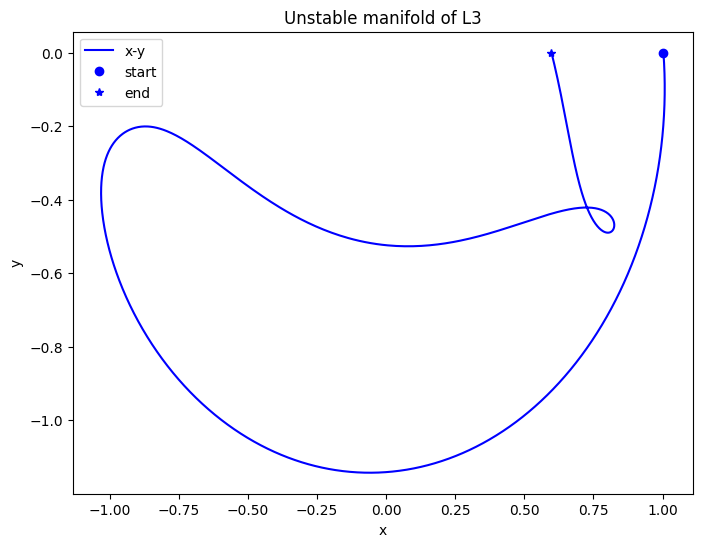

In [54]:
tmax_plot = TimeDuration
t_span_plot = np.arange(t0, tmax_plot, 0.01)

# Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
# system of ODEs as a scipy.integrate.solve_ivp object
sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax_plot, 
                 len(t_span_plot), tol=1e-12, method='DOP853', hamiltonian=0)

# Extract the solution
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', label='x-y')
ax.plot(x[0], y[0], 'bo', label='start')
ax.plot(x[-1], y[-1], 'b*', label='end')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Unstable manifold of L3')
ax.legend()
#ax.plot(newInitial[0], newInitial[1], 'ro', label='start')
plt.show()

In [5]:
# test the function
iregion = 1
mu = 0.1
# Solve the variational equations
t0 = 0
tmax = 0.15
dt = 0.1
t_span = np.arange(t0, tmax, dt)

refinement= 20000
init_tol = 1e-15
refinement_fine = 300
tol = 1e-14
start_cond_tol = 10**-6

crossing_times, crossing_initials, _ = \
    crossings_R3BP_by_mu(1, 3, lambda t, X: ODE_R3BP(t, mu, X), iregion, dt, 
                         t_span, mu, refinement, init_tol, refinement_fine, 
                         tol, start_cond_tol)

print("\nTime duration of the unstable manifold = ", crossing_times)
print("\nInitial conditions of the unstable manifold = \n", crossing_initials)


c:\Users\rannu\OneDrive - NTNU\Desktop\VsPython\ntnusession\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "



Time duration of the unstable manifold =  [32.46888568]

Initial conditions of the unstable manifold = 
 [[-1.93098638e+00 -3.67761377e-15 -4.45099793e-02  1.30667783e+00]]


In [6]:
# mu interval calculations
#  xincmu 0.00001, mu in (0.001,0.015)
print("number of mu values = ", int((0.015-0.001)/0.00001))
mu = np.arange(0.001, 0.015, 0.00001)
print("number of mu values in list = ", len(mu))
# xincmu 0.0001, mu in (0.015,0.05)
print("\nnumber of mu values = ", int((0.05-0.015)/0.0001))
mu = np.arange(0.015, 0.05, 0.0001)
print("number of mu values in list = ", len(mu))
# xincmu 0.001, mu in (0.05,0.49)
print("\nnumber of mu values = ", int((0.49-0.05)/0.001))
mu = np.arange(0.05, 0.49, 0.001)
print("number of mu values in list = ", len(mu))

number of mu values =  1399
number of mu values in list =  1400

number of mu values =  350
number of mu values in list =  350

number of mu values =  440
number of mu values in list =  440


In [7]:
# TEMPORARY
def crossings_R3BP_TEMP(no_crossings, ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15):
    crossing_times = np.zeros(no_crossings)
    crossing_initials = np.zeros((no_crossings, 4))
    new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                                (ODE_R3BP, initial_conditions, dir,
                                                step, t_span, mu, init_search, 
                                                refinement, newton_tol)
    crossing_times[0] = time_duration
    crossing_initials[0] = new_initial

    for i in range(1, no_crossings):
        new_initial, time_duration = poincare_map_solve_ivp_R3BP\
                                        (ODE_R3BP, crossing_initials[i-1], dir,
                                        step, t_span, mu, init_search, 
                                        refinement, newton_tol)
        crossing_times[i] = time_duration
        crossing_initials[i] = new_initial
    
    return crossing_times, crossing_initials

def crossings_R3BP_by_mu_TEMP(no_crossings, L123, ODE_R3BP, dir,
                                step, t_span, mu, init_search=100, 
                                refinement=100, newton_tol = 1e-15,
                                start_cond_tol = 10**-6):
    Li = [compute_Lagrange_pt(mu, L123), 0, 0, 0] 
    Li.extend([1, 0, 0, 0, 
               0, 1, 0, 0, 
               0, 0, 1, 0, 
               0, 0, 0, 1])  # initial conditions and identity matrix
    time_span = 0

    # compute the Jacobian matrix of the RTBP at Li.
    # The eigenvalues of this matrix are the frequencies of the periodic orbit

    A = variational_eq(t_span[0], Li, mu, 1)[4:20].reshape(4,4)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    lambda_pos = eigenvalues[3].real
    lambda_neg = eigenvalues[2].real
    eigvec_pos = eigenvectors[:,3].real
    eigvec_neg = eigenvectors[:,2].real
    if dir == 1:
        if eigvec_pos[1] > 0:
            eigvec_pos = -eigvec_pos
        v = eigvec_pos
    elif dir == -1:
        v = eigvec_neg
    else:
        raise ValueError("Direction must be 1 or -1")
    init_cond = Li[0:4] + v*start_cond_tol

    crossing_times, crossing_initials = \
        crossings_R3BP_TEMP(no_crossings, ODE_R3BP, init_cond, dir, step, t_span, 
                       mu, init_search, refinement, newton_tol)
    
    return crossing_times, crossing_initials

In [8]:
from tqdm import tqdm # for the progress bar
def crossing_times_and_initials_by_mu(mu_list, Li, iregion, dt, t_span, 
                                      refinement, init_tol, refinement_fine,
                                      tol, start_cond_tol):
    crossing_times = np.zeros(len(mu_list))
    crossing_initials = np.zeros((len(mu_list), 4))
    mu_fails = []
    for j, mu_val in tqdm(enumerate(mu_list, start=0)):
        crossing_times_mu, crossing_initials_mu, mu_fail = \
            crossings_R3BP_by_mu(1, Li, lambda t, X: ODE_R3BP(t, mu_val, X),
                                iregion, dt, t_span, mu_val, 
                                refinement, init_tol, refinement_fine, tol,
                                start_cond_tol)
        crossing_times[j] = crossing_times_mu
        crossing_initials[j] = crossing_initials_mu
        if mu_fail != -1:
            mu_fails.append(mu_val)
    return crossing_times, crossing_initials, mu_fails

### Interval 1

In [9]:
# test mu of only 5 different mu values
mu_list = np.arange(0.001, 0.015, 0.00001)
print("number of mu values = ", len(mu_list))

iregion = 1

t0 = 0
tmax = 1
dt = 0.5
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 25
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-6 # even a relatively large tolerance gives good results

# Test the function
crossing_times, crossing_initials, mu_fails = \
    crossing_times_and_initials_by_mu(mu_list, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  1400


0it [00:00, ?it/s]

1400it [06:56,  3.36it/s]


In [77]:
print("\nTime duration of the unstable manifold =\n ", crossing_times)
print(len(crossing_times))
print("\nInitial conditions of the unstable manifold =\n ", crossing_initials)
# print("\nmu values that failed = ", mu_fails)


Time duration of the unstable manifold =
  [304.15209481 302.63896492 301.09339435 ...  55.78235326  55.7640797
  55.74582652]
1400

Initial conditions of the unstable manifold =
  [[ 9.96459404e-01 -1.35877754e-08  1.36314268e-04  6.86383074e-03]
 [ 9.96480734e-01  2.48111453e-08 -7.55583422e-04  6.79348826e-03]
 [ 9.96987160e-01  8.32883025e-11 -1.58779365e-03  5.74773614e-03]
 ...
 [-9.51804065e-01 -8.71158656e-09  8.43294485e-02  9.07041768e-01]
 [-9.51964167e-01 -9.40239829e-08  8.35331128e-02  9.09953898e-01]
 [-9.52123632e-01 -6.87557937e-07  8.27423703e-02  9.12875751e-01]]


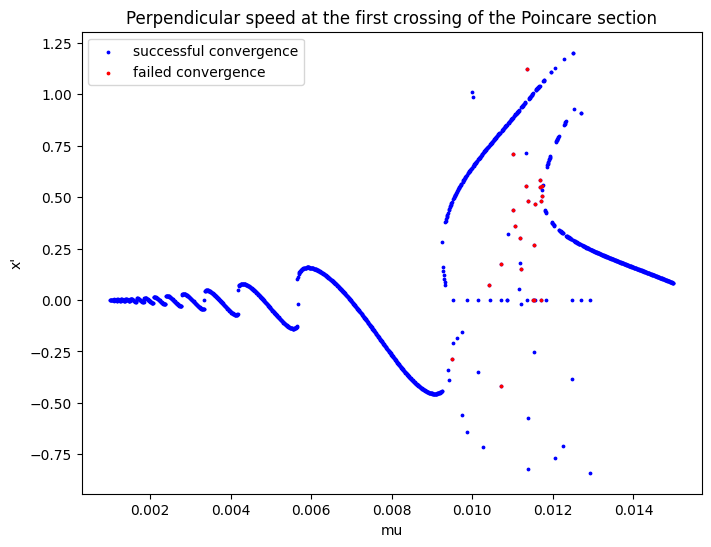

In [23]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list, crossing_initials[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_fails:
    mu_fails_index.append(np.where(mu_list == mu_fail)[0][0])
ax.scatter(mu_fails, crossing_initials[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

### Interlude interval

In [38]:
# test mu of only 5 different mu values
mu_list1 = np.arange(0.009, 0.015, 0.00005)
print("number of mu values = ", len(mu_list1))

iregion = 1

t0 = 0
tmax = 1
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 20000
refinement_fine = 25
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-6 # even a relatively large tolerance gives good results

# Test the function
crossing_times1, crossing_initials1, mu_fails1 = \
    crossing_times_and_initials_by_mu(mu_list1, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  120


120it [07:17,  3.65s/it]


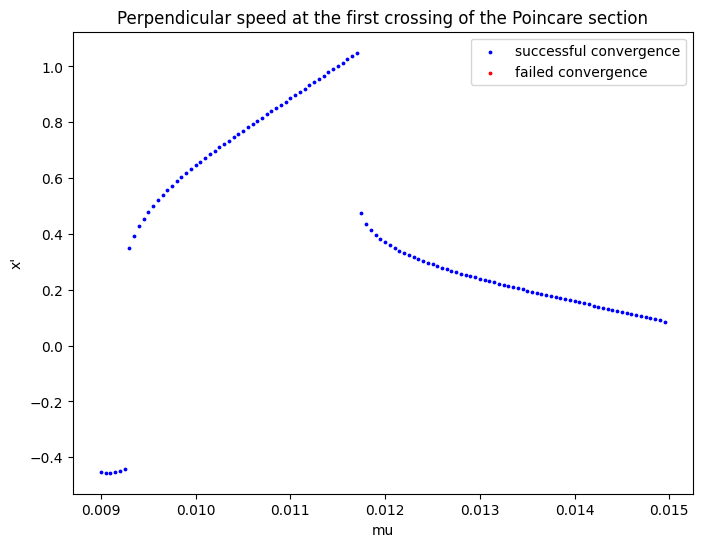

In [39]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list1, crossing_initials1[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_fails1:
    mu_fails_index.append(np.where(mu_list1 == mu_fail)[0][0])
ax.scatter(mu_fails1, crossing_initials1[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

### Second interval

In [29]:
# test mu of only 5 different mu values
mu_list2 = np.arange(0.015, 0.05, 0.0001)
print("number of mu values = ", len(mu_list2))

iregion = 1

t0 = 0
tmax = 0.8
dt = 0.05
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 60
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-4 # even a relatively large tolerance gives good results

# Test the function
crossing_times2, crossing_initials2, mu_fails2 = \
    crossing_times_and_initials_by_mu(mu_list2, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  350


350it [03:18,  1.76it/s]


In [14]:
# print("\nTime duration of the unstable manifold =\n ", crossing_times)
# print("\nInitial conditions of the unstable manifold =\n ", crossing_initials2)
# print("\nmu values that failed = ", mu_fails2)

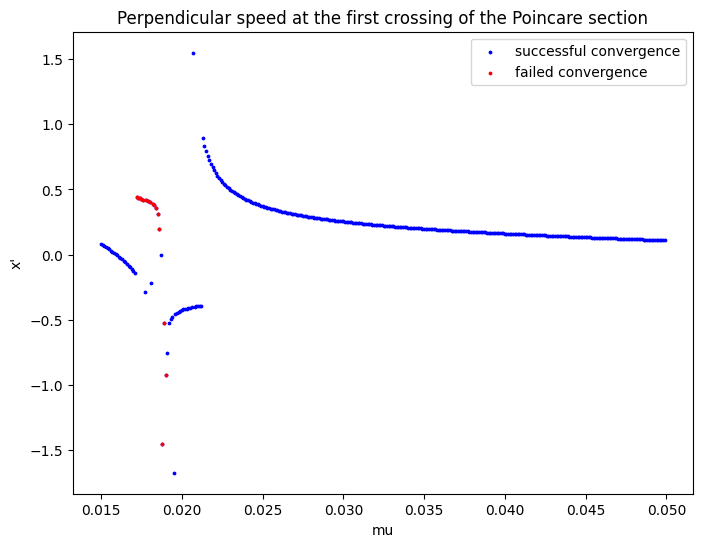

In [31]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list2, crossing_initials2[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_fails2:
    mu_fails_index.append(np.where(mu_list2 == mu_fail)[0][0])
ax.scatter(mu_fails2, crossing_initials2[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

### Interval 3 modified

In [66]:
# test mu of only 5 different mu values
mu_list2m = np.arange(0.015, 0.025, 0.0001)
print("number of mu values = ", len(mu_list2m))

iregion = 1

t0 = 0
tmax = 0.8
dt = 0.01
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 20000
refinement_fine = 60
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-4 # even a relatively large tolerance gives good results

# Test the function
crossing_times2m, crossing_initials2m, mu_fails2m = \
    crossing_times_and_initials_by_mu(mu_list2m, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  101


101it [05:18,  3.16s/it]


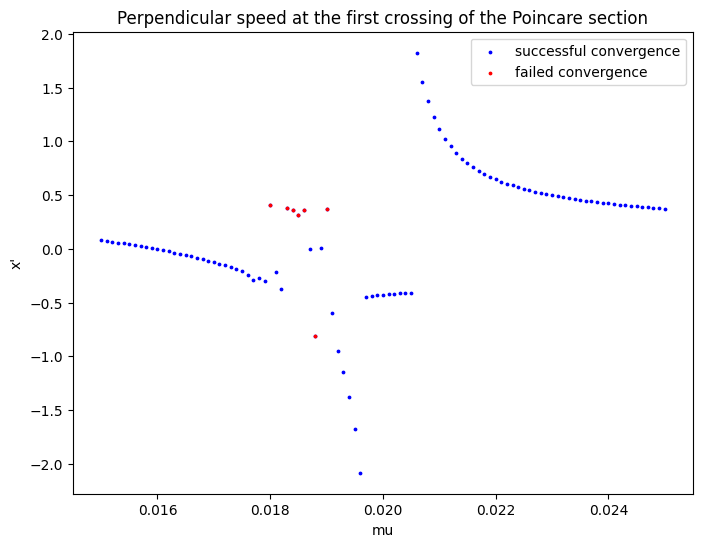

In [67]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list2m, crossing_initials2m[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_fails2m:
    mu_fails_index.append(np.where(mu_list2m == mu_fail)[0][0])
ax.scatter(mu_fails2m, crossing_initials2m[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

### Interval 3

In [60]:
# test mu of only 5 different mu values
mu_list3 = np.arange(0.05, 0.1, 0.0001)
print("number of mu values = ", len(mu_list3))

iregion = 1

t0 = 0
tmax = 1
dt = 0.5
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 25
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-4 # even a relatively large tolerance gives good results

# Test the function
crossing_times3, crossing_initials3, mu_fails3 = \
    crossing_times_and_initials_by_mu(mu_list3, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  500


500it [00:38, 12.89it/s]


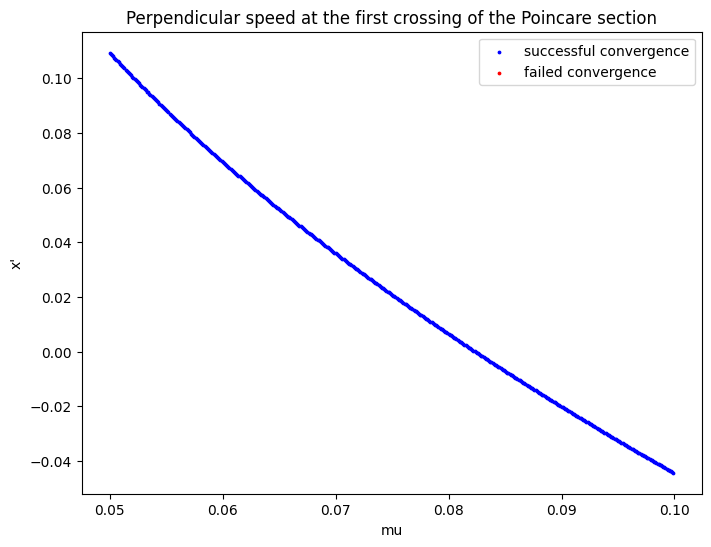

In [61]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list3, crossing_initials3[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_fails3:
    mu_fails_index.append(np.where(mu_list3 == mu_fail)[0][0])
ax.scatter(mu_fails3, crossing_initials3[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

### Whole interval

In [57]:
# test mu of only 5 different mu values
mu_listw = np.arange(0.001, 0.5, 0.001)
print("number of mu values = ", len(mu_listw))

iregion = 1

t0 = 0
tmax = 1
dt = 0.1
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 20000
refinement_fine = 25
init_tol = 1e-7
start_cond_tol = 10**-4

# tol for newton solver:
tol = 1e-6 # even a relatively large tolerance gives good results

# Test the function
crossing_timesw, crossing_initialsw, mu_failsw = \
    crossing_times_and_initials_by_mu(mu_listw, 3, 1, dt, t_span, 
                                      refinement, init_tol, refinement_fine, 
                                      tol, start_cond_tol)

number of mu values =  499


499it [01:08,  7.25it/s]


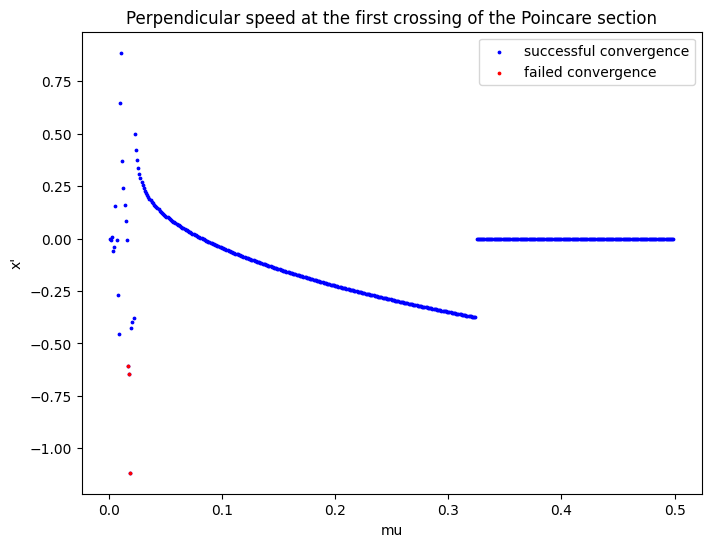

In [58]:
# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_listw, crossing_initialsw[:,2], color='b', 
           label='successful convergence', s=3)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
# color points where mu fails red
# find the index of the mu values that failed
mu_fails_index = []
for mu_fail in mu_failsw:
    mu_fails_index.append(np.where(mu_listw == mu_fail)[0][0])
ax.scatter(mu_failsw, crossing_initialsw[mu_fails_index,2], color='r', 
           label='failed convergence', s=3)
# legend for both red and blue points
ax.legend()
plt.show()

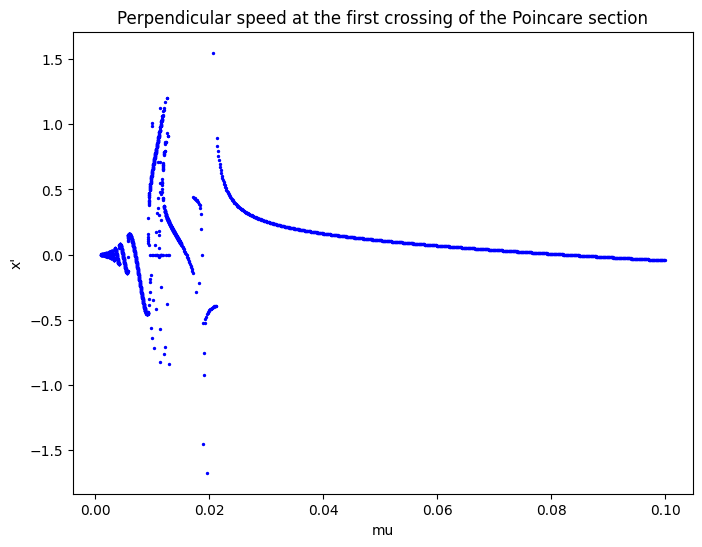

In [65]:
# similarly plot crossing_initials, crossing_initials2, and crossing_initials3
# in the same plot

# plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(mu_list, crossing_initials[:,2], color='b', 
           label='successful convergence', s=2)
ax.scatter(mu_list2, crossing_initials2[:,2], color='b',
                s=2)
ax.scatter(mu_list3, crossing_initials3[:,2], color='b',
                  s=2)
ax.set_xlabel('mu')
ax.set_ylabel("x'")
ax.set_title('Perpendicular speed at the first crossing of the Poincare section')
plt.show()

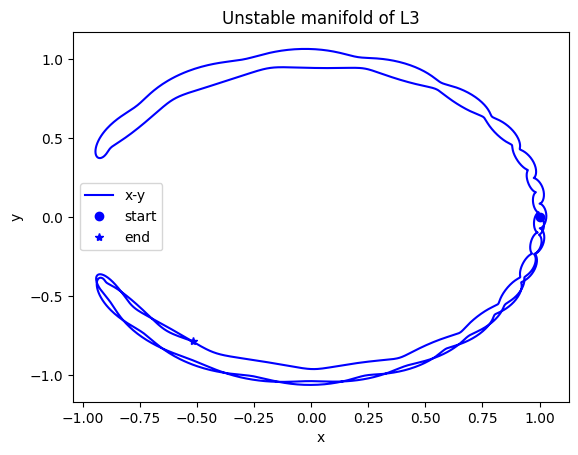

In [80]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



iregion = 1

# Find the crossing time of the unstable manifold with the Poincare section
t0 = 0
tmax = 2
dt = 1
t_span = np.arange(t0, tmax, dt)

# Variables for tweaking the accuracy of the crossing time
refinement = 2000
refinement_fine = 25
tol = 1e-6

fig, ax = plt.subplots()
frame_NO = 10

def update(i):
    ax.clear()
    a = i*len(crossing_times)//frame_NO
    tmax_plot = crossing_times[a]
    mu_single = mu_list[a]
    A = variational_eq(0, L3, mu_single, iregion)[4:20].reshape(4,4)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigvec_pos = eigenvectors[:,3]
    v = -eigvec_pos.real
    init_cond = L3[0:4] + v*10**-4
    t_span_plot = np.arange(t0, tmax_plot, 0.1)
    sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu_single, X), init_cond, tmax_plot, 
                    len(t_span_plot), tol=1e-6, method='DOP853', hamiltonian=0)
    x = sol.y[0]
    y = sol.y[1]
    # for i in range(NP):
    #     plt.plot(x[i*N:(i+1)*N], y[i*N:(i+1)*N], '.', markersize=1)
    ax.plot(x, y, 'b', label='x-y')
    ax.plot(x[0], y[0], 'bo', label='start')
    ax.plot(x[-1], y[-1], 'b*', label='end')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Unstable manifold of L3')
    ax.legend()
    #ax.plot(newInitial[0], newInitial[1], 'ro', label='start')
    plt.show()
    

frame_NO = 10

ani = FuncAnimation(fig, update, frames=np.arange(0, frame_NO), interval=frame_NO)
ani.save('animation_first.gif', writer='pillow', fps=20)
HTML(ani.to_jshtml())